In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250131_1/250131 GMT3 set1 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250131_2/250131 GMT3 set2 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250131_3/250131 GMT3 set3 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250131_4/250131 GMT3 set4 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 11/27 modes/250131_5/250131 GMT3 set5 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 


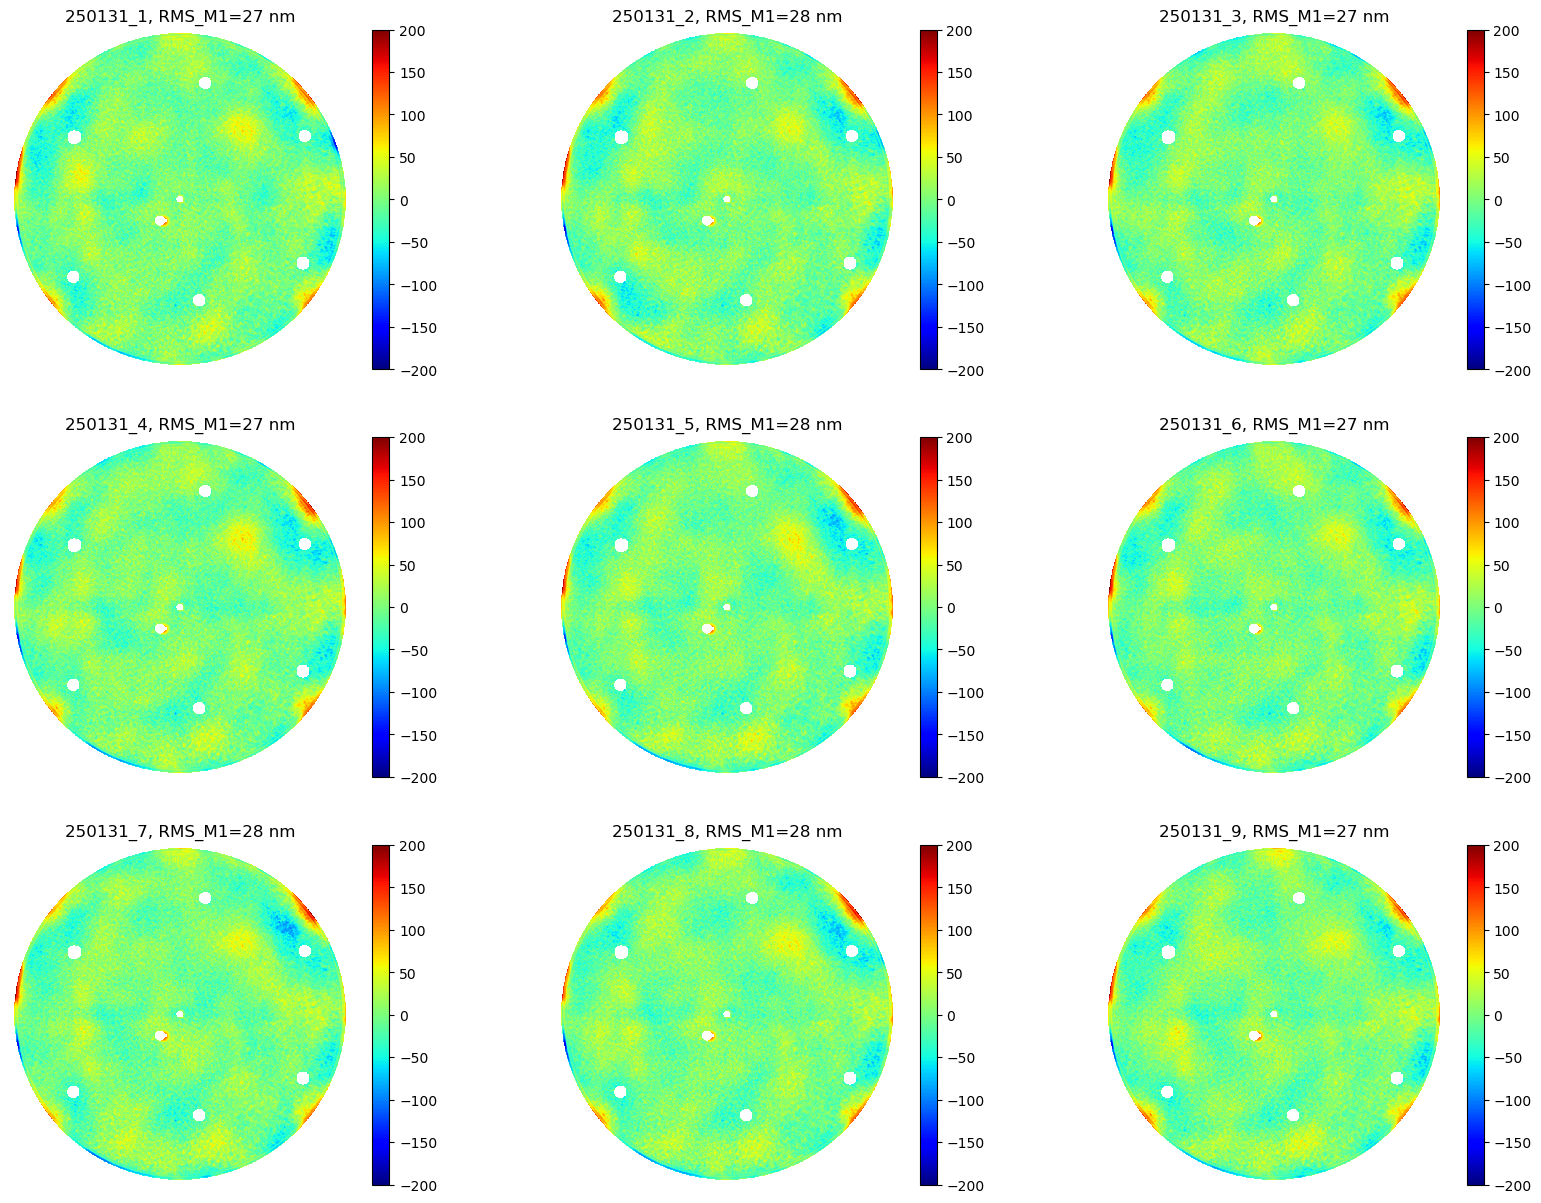

In [2]:
dateID = '250131'
m1s_9 = np.zeros((Sxn, Syn, 9))
fig, ax = plt.subplots(3,3,figsize=(20,15))
for i in range(9):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    globstring = '%s/Sec 11/27 modes/%s_%s/%s*set*patched - 27 GMT modes.h5'%(ml_data_dir,dateID, i+1, dateID)
    #print(globstring)
    fileset = sorted(glob.glob(globstring))
    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    m1s_9[:,:,i] = m1s
    
    m1rms = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1, m1rms))
    ax[irow][icol].axis('off')

on bar 135
on bar 235
on bar 335
on bar 435
on puck  1135
on puck  1235
on puck  1335
on puck  1435


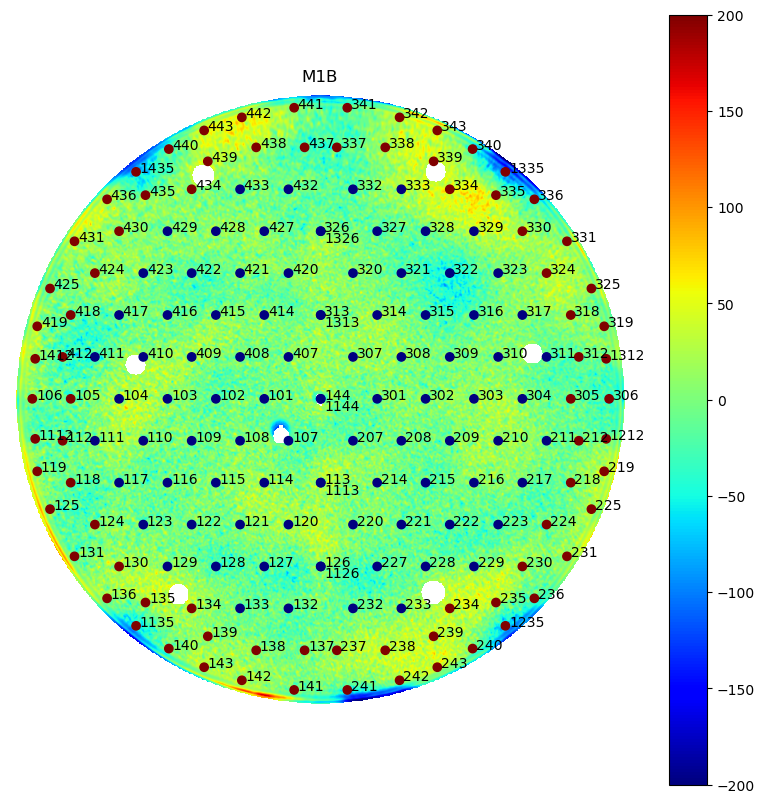

In [3]:
m1s = -np.mean(m1s_9, axis=2).T
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.imshow(m1s, origin='lower', vmin=-200, vmax=200)
plt.title('M1B')
plt.axis('off')
plt.colorbar()
saxpix = np.zeros_like(sax)
saypix = np.zeros_like(say)
sa8 = []
for i in range(len(sax)):
    saxpix[i] = saID2pixx(saID[i], centerRow, centerCol, pixelSize)
    saypix[i] = saID2pixy(saID[i], centerRow, centerCol, pixelSize)
    if (np.any(abs(sax[i]+say[i]-sax[:i]-say[:i])<1e-4)):
        plt.text(saxpix[i]+.05/pixelSize, saypix[i]-0.15/pixelSize, str(saID[i]))
    else:
        plt.text(saxpix[i]+.05/pixelSize, saypix[i], str(saID[i]))
    if np.mod(saID[i],100) == 35:
        sa8.append(saID[i])
        if dfSA['LSActType'][i]==30:
            print('on puck ', saID[i])
        if dfSA['LSActType'][i]==31:
            print('on bar', saID[i])
plt.scatter(saxpix, saypix, c=saz);

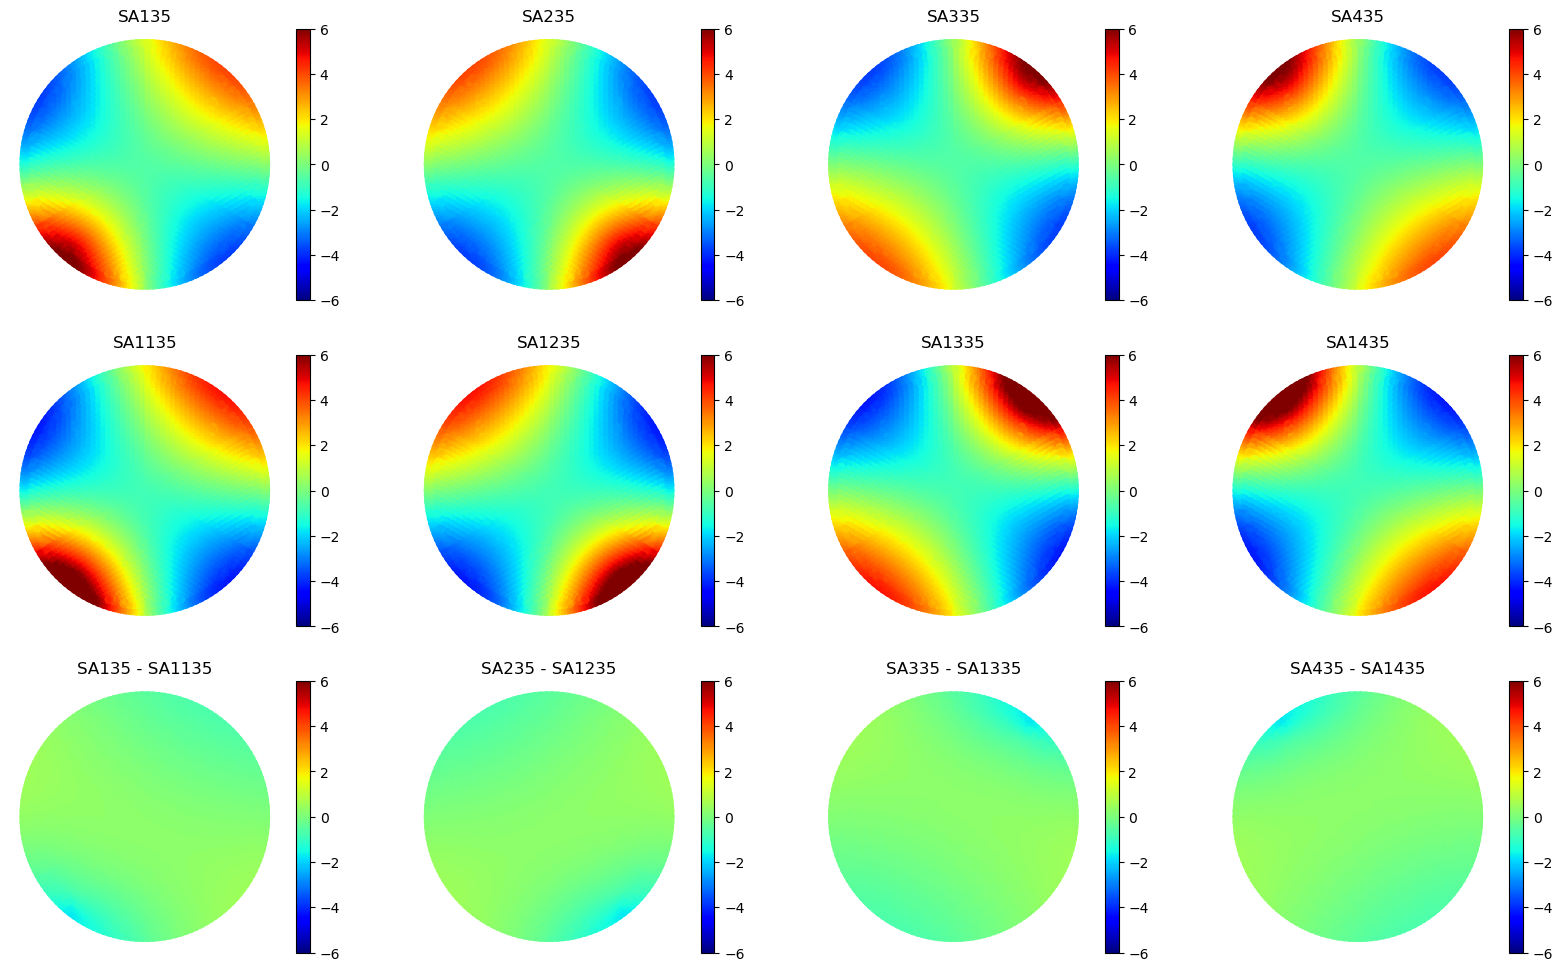

In [4]:
sa8 = np.sort(sa8)
if8 = np.zeros_like(Afz[:,:8]) #for storing the 8 IFs, with + and - signs included
nrow = 3
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
for i,mysaID in enumerate(sa8):
    modeID = np.argmax(saID==mysaID)+1
    if dfSA['LSActType'][modeID-1]==31:
        if8[:,i] = Afz[:,modeID-1]*1e9 #convert to nm
    elif dfSA['LSActType'][modeID-1]==30: #pucks on outside, make surface there negative (in M1B)
        if8[:,i] = -Afz[:,modeID-1]*1e9 #convert to nm
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    img = ax[irow][icol].scatter(nodex, nodey, 10, Afz[:,modeID-1]*1e9, vmin=-6, vmax=6)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('SA%d'%mysaID)
for i in range(8,12):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    modeID1 = np.argmax(saID==sa8[i-8])+1
    modeID2 = np.argmax(saID==sa8[i-4])+1
    img = ax[irow][icol].scatter(nodex, nodey, 10, Afz[:,modeID1-1]*1e9-Afz[:,modeID2-1]*1e9, vmin=-6, vmax=6)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('SA%d - SA%d'%(sa8[i-8], sa8[i-4]))
ifcombined = np.sum(if8, axis=1)

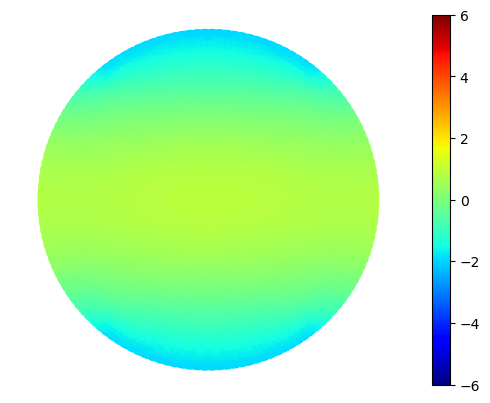

In [5]:
plt.scatter(nodex, nodey, 10, ifcombined, vmin=-6, vmax=6)
plt.axis('equal')
plt.colorbar()
plt.axis('off');

In [6]:
from scipy.interpolate import LinearNDInterpolator 

#[x1, y1] are the x and y grid in M1B. 
#CenterCol and centerRow are swapped, because they were meant for h5 CS
#Lines below, we will transpose the h5 map to match this.
#.  we will also reverse the sign of h5 maps to be in M1B.
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)

if2d = m1s #this is the measured influence function, which is already in M1B, in nm
mask = ~np.isnan(if2d)

interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), if2d[mask], fill_value=0)
mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
validIdx = mapOntoGMTFEgrid!=0
scaleF = np.linalg.pinv(ifcombined[validIdx].reshape((-1,1)))  @ mapOntoGMTFEgrid[validIdx] #all in nm
scaleF = scaleF[0]

residual = mapOntoGMTFEgrid[validIdx] - scaleF* np.squeeze(ifcombined[validIdx]) #this is residual
print(scaleF)

fig, ax = plt.subplots(1,3,figsize=(12,3))
img = ax[0].imshow(if2d, origin='lower', vmin=-200, vmax=200)
ax[0].axis('off')
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(nodex, nodey, 10, ifcombined*scaleF, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[1])
ax[1].axis('off')
img = ax[2].scatter(nodex[validIdx], nodey[validIdx], 10, residual, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[2])
ax[2].axis('off');
#this fit is dominated by the vast center area

1.1728367423793382


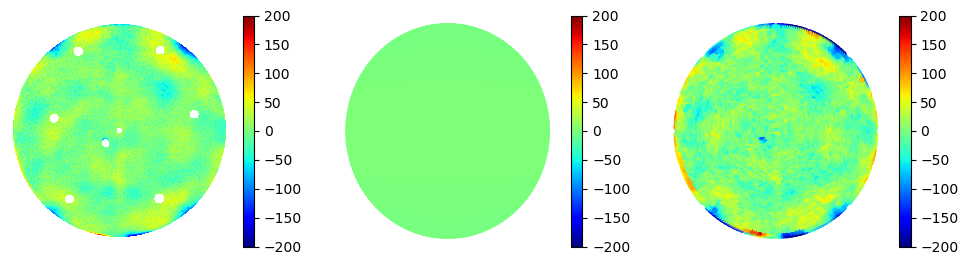

(-4.596131696820772, 4.596114064065823, -4.597891669006933, 4.597881038697793)

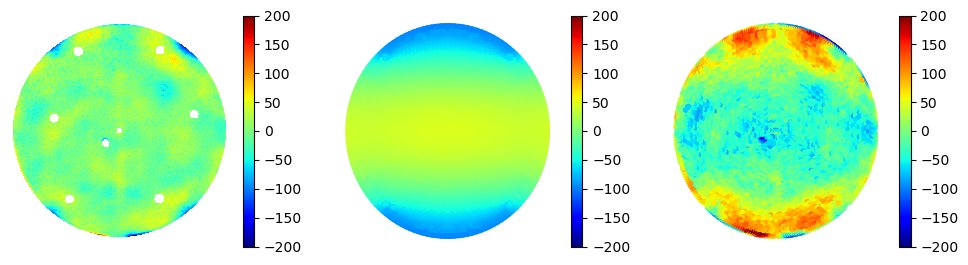

In [8]:
scaleF = 50
residual = mapOntoGMTFEgrid[validIdx] - scaleF* np.squeeze(ifcombined[validIdx]) #this is residual

fig, ax = plt.subplots(1,3,figsize=(12,3))
img = ax[0].imshow(if2d, origin='lower', vmin=-200, vmax=200)
ax[0].axis('off')
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(nodex, nodey, 10, ifcombined*scaleF, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[1])
ax[1].axis('off')
img = ax[2].scatter(nodex[validIdx], nodey[validIdx], 10, residual, vmin=-200, vmax=200)
fig.colorbar(img, ax=ax[2])
ax[2].axis('off')

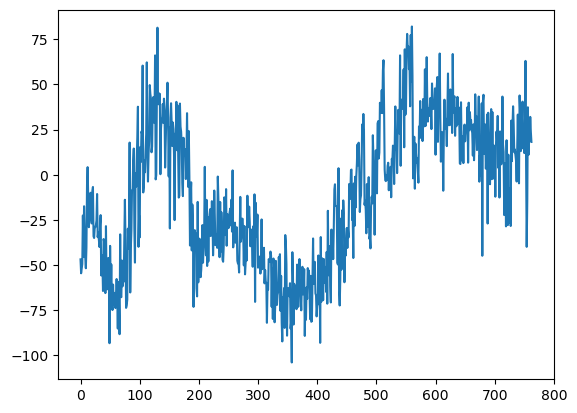

In [9]:
nodetheta = np.rad2deg(np.arctan2(nodey, nodex)[validIdx])
noder = np.sqrt(nodex**2+nodey**2)[validIdx]
idx = (nodetheta>35) & (nodetheta<45)# & noder>4
plt.plot(residual[idx])

### Try ML IFs

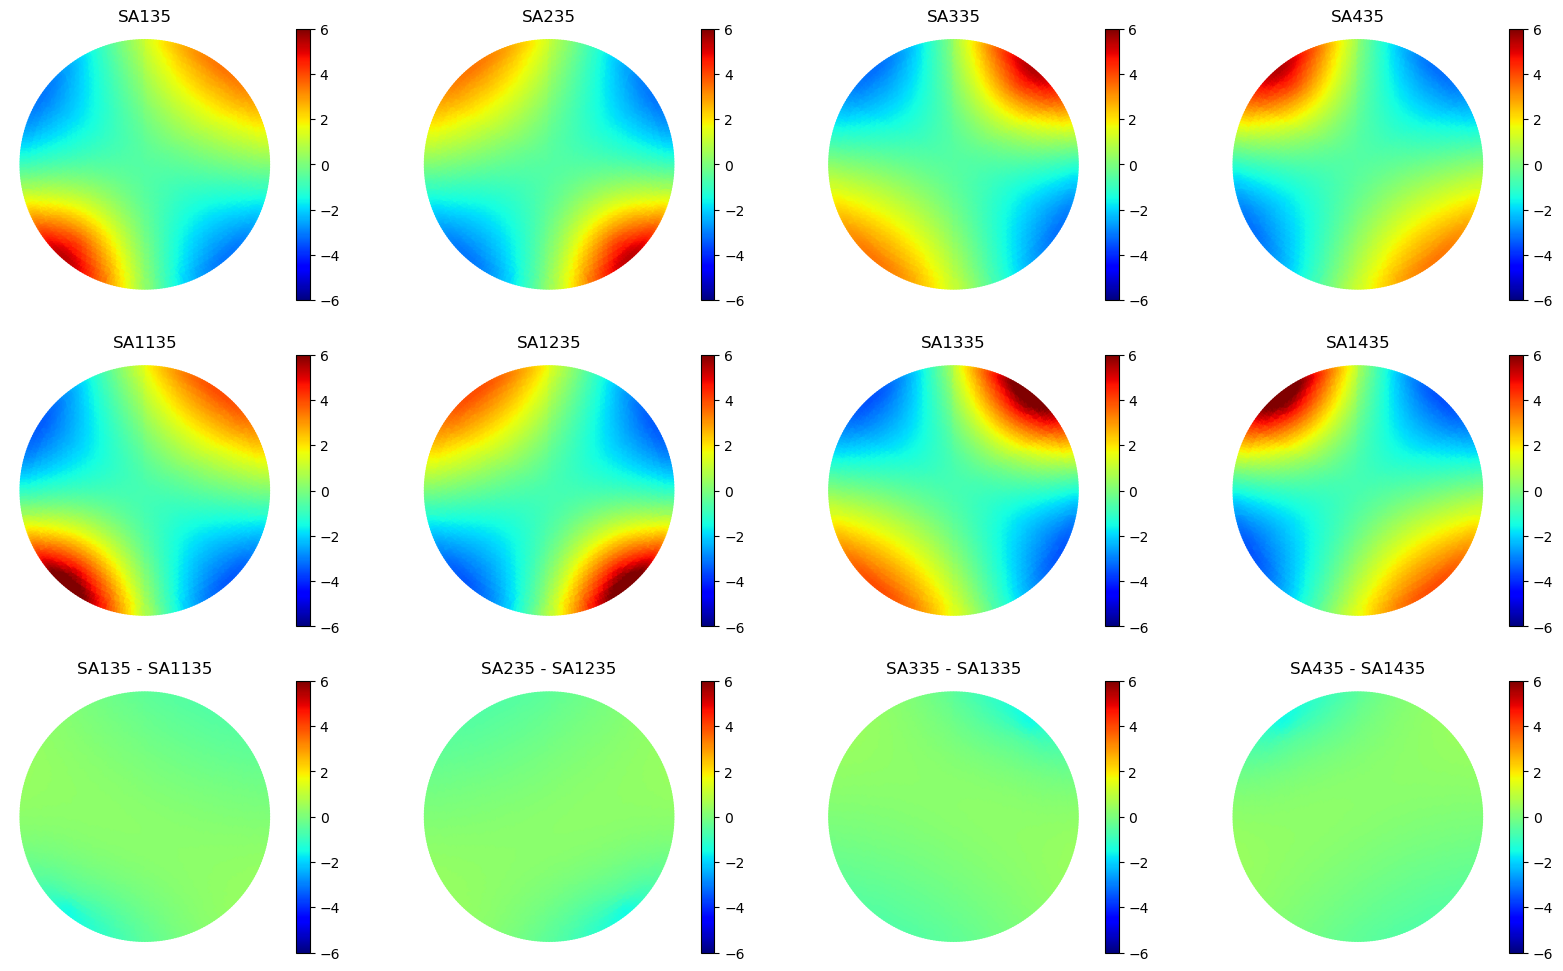

In [10]:
sa8 = np.sort(sa8)
if8 = np.zeros_like(Afn_ml[:,:8]) #for storing the 8 IFs, with + and - signs included
nrow = 3
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
for i,mysaID in enumerate(sa8):
    modeID = np.argmax(saID==mysaID)+1
    modeID_ml = np.argmax(saID_ml==mysaID)+1
    if dfSA['LSActType'][modeID-1]==31:
        if8[:,i] = Afn_ml[:,modeID_ml-1] #already in nm
    elif dfSA['LSActType'][modeID-1]==30: #pucks on outside, make surface there negative (in M1B)
        if8[:,i] = -Afn_ml[:,modeID_ml-1] #already in nm
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    img = ax[irow][icol].scatter(nodex_ml, nodey_ml, 10, Afn_ml[:,modeID_ml-1], vmin=-6, vmax=6)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('SA%d'%mysaID)
for i in range(8,12):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    modeID_ml1 = np.argmax(saID_ml==sa8[i-8])+1
    modeID_ml2 = np.argmax(saID_ml==sa8[i-4])+1
    img = ax[irow][icol].scatter(nodex_ml, nodey_ml, 10, Afn_ml[:,modeID_ml1-1]-Afn_ml[:,modeID_ml2-1],
                                 vmin=-6, vmax=6)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('SA%d - SA%d'%(sa8[i-8], sa8[i-4]))
ifcombined = np.sum(if8, axis=1)

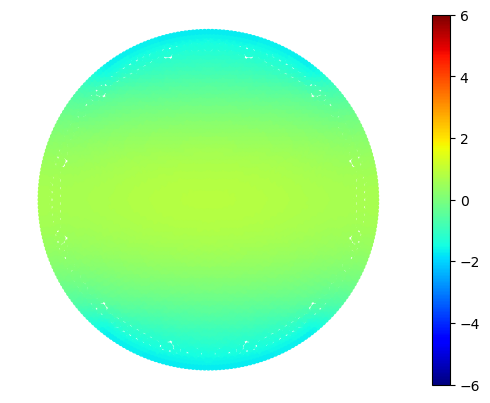

In [11]:
plt.scatter(nodex_ml, nodey_ml, 10, ifcombined, vmin=-6, vmax=6)
plt.axis('equal')
plt.colorbar()
plt.axis('off');

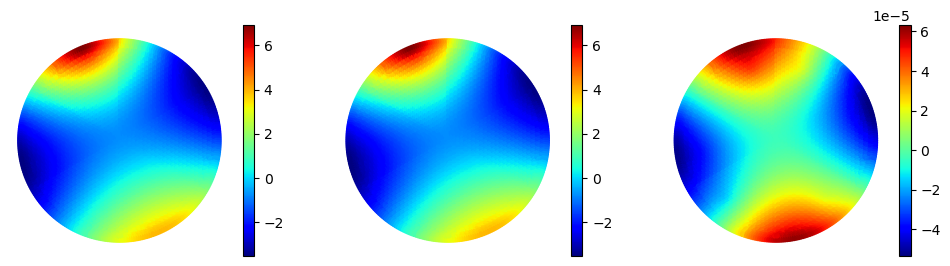

In [12]:
IF_ml = Afn_ml @ fv_ml
fig, ax = plt.subplots(1,3,figsize=(12,3))

img = ax[0].scatter(nodex_ml, nodey_ml, 10, Afn_ml[:,0])
ax[0].axis('square')
ax[0].axis('off')
fig.colorbar(img, ax=ax[0])

img = ax[1].scatter(nodex_ml, nodey_ml, 10, IF_ml[:,0])
ax[1].axis('square')
ax[1].axis('off')
fig.colorbar(img, ax=ax[1])

img = ax[2].scatter(nodex_ml, nodey_ml, 10, Afn_ml[:,0]-IF_ml[:,0])
ax[2].axis('square')
ax[2].axis('off')
fig.colorbar(img, ax=ax[2])


## 8 column influence matrix

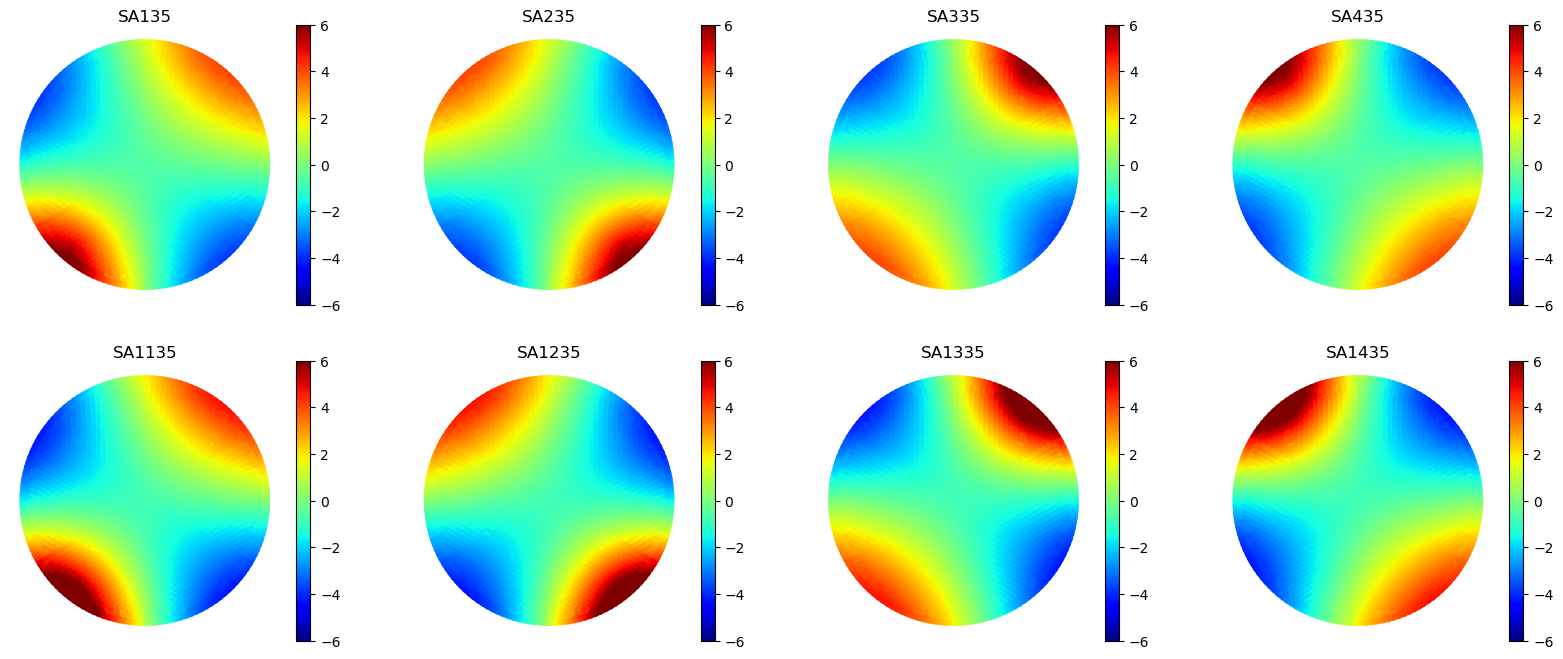

In [29]:
Afz8 = np.zeros_like(Afz[:,:8]) #for storing the 8 IFs, with + and - signs included
sax8 = np.zeros(8)
say8 = np.zeros(8)
nrow = 2
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
for i,mysaID in enumerate(sa8):
    modeID = np.argmax(saID==mysaID)+1
    Afz8[:,i] = Afz[:,modeID-1]*1e9 #convert to nm
    sax8[i] = sax[modeID-1]
    say8[i] = say[modeID-1]
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    img = ax[irow][icol].scatter(nodex, nodey, 10, Afz[:,modeID-1]*1e9, vmin=-6, vmax=6)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('SA%d'%mysaID)

In [82]:
print(np.std(Afz8, axis=0))
print(np.mean(Afz8, axis=0))
print(np.sum(Afz8, axis=0))

[1.92298736 1.92348678 1.92070336 1.92109145 2.23646025 2.23716899
 2.23344581 2.23395793]
[-8.83180864e-16  5.61273820e-16 -1.28762818e-15  5.03495633e-16
 -6.60322142e-16 -1.50223287e-15 -1.04000737e-15  1.48572482e-15]
[-2.43289833e-11  1.54614099e-11 -3.54702934e-11  1.38697942e-11
 -1.81898940e-11 -4.13820089e-11 -2.86490831e-11  4.09272616e-11]


In [115]:
U, S, Vt = np.linalg.svd(Afz8, full_matrices=False) 
print(U.shape, S.shape, Vt.shape)

(27547, 8) (8,) (8, 8)


In [116]:
S

array([926.02542508, 260.49828677, 154.01231912,  91.0511067 ,
         9.6772959 ,   6.87252905,   6.58128884,   6.07934515])

In [117]:
condition_number = np.linalg.cond(Afz8)
print(condition_number)

152.3232194806482


In [118]:
Afz8_reconstructed = U @ np.diag(S) @ Vt

In [119]:
np.allclose(Afz8, Afz8_reconstructed)

True

In [120]:
print(np.std(Vt.T, axis=0))
print(np.mean(Vt.T, axis=0))
print(np.sum(Vt.T, axis=0))
print(np.sum(Vt.T**2, axis=0))

[0.35355339 0.06390746 0.35355331 0.35355269 0.35355294 0.34773082
 0.35355339 0.35355339]
[-5.39836616e-05 -3.47729545e-01  2.41066513e-04  7.05617690e-04
  5.65577423e-04  6.39005374e-02 -5.90621161e-05  5.02953852e-05]
[-4.31869293e-04 -2.78183636e+00  1.92853211e-03  5.64494152e-03
  4.52461938e-03  5.11204299e-01 -4.72496929e-04  4.02363082e-04]
[1. 1. 1. 1. 1. 1. 1. 1.]


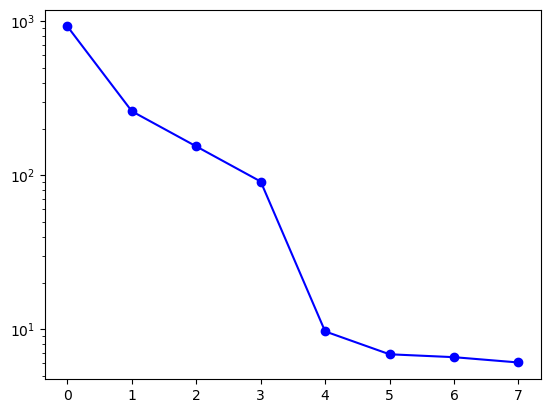

In [121]:
plt.semilogy(S, '-bo');

In [218]:
#Make UMat and VMat out of my SVD
UMat8 = U * np.sqrt(U.shape[0])
VMat8 = np.zeros((8,8))
for modeID in range(1, Vt.shape[1]+1):
    VMat8[:, modeID-1] = Vt.T[:, modeID-1] * 1e3/S[modeID-1]*np.sqrt(UMat8.shape[0])
    #1e3 due to nanometer to micron conversion

In [219]:
np.mean(UMat8, axis=0)

array([-4.76645864e-16,  1.13317551e-15,  1.58761852e-15, -1.33843397e-15,
       -1.80207772e-14,  1.12183831e-15,  1.83382308e-14, -2.28932526e-14])

In [220]:
for i in range(8):
    for j in range(i+1,8):
        print('%d, %d, %.2f'%(i,j,np.dot(UMat8[:,i], UMat8[:,j])))

0, 1, 0.00
0, 2, 0.00
0, 3, 0.00
0, 4, -0.00
0, 5, 0.00
0, 6, 0.00
0, 7, -0.00
1, 2, -0.00
1, 3, 0.00
1, 4, -0.00
1, 5, -0.00
1, 6, -0.00
1, 7, 0.00
2, 3, 0.00
2, 4, -0.00
2, 5, 0.00
2, 6, 0.00
2, 7, -0.00
3, 4, 0.00
3, 5, 0.00
3, 6, 0.00
3, 7, -0.00
4, 5, -0.00
4, 6, -0.00
4, 7, -0.00
5, 6, 0.00
5, 7, -0.00
6, 7, 0.00


In [124]:
np.mean(VMat8, axis=0)

array([-9.67557051e-03, -2.21551082e+02,  2.59787697e-01,  1.28623815e+00,
        9.70007737e+00,  1.54321018e+03, -1.48948182e+00,  1.37312000e+00])

In [125]:
forcerms = np.sqrt(np.mean(VMat8**2, axis=0))

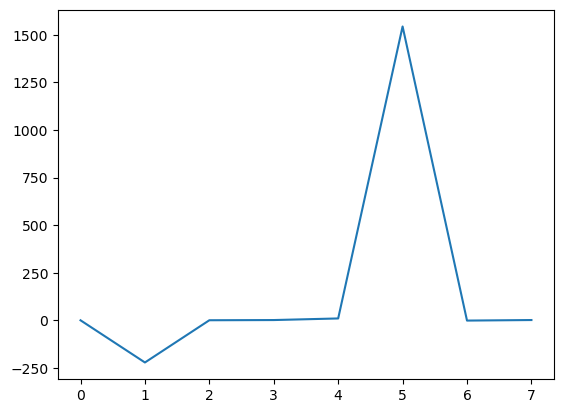

In [126]:
plt.plot(np.mean(VMat8, axis=0))

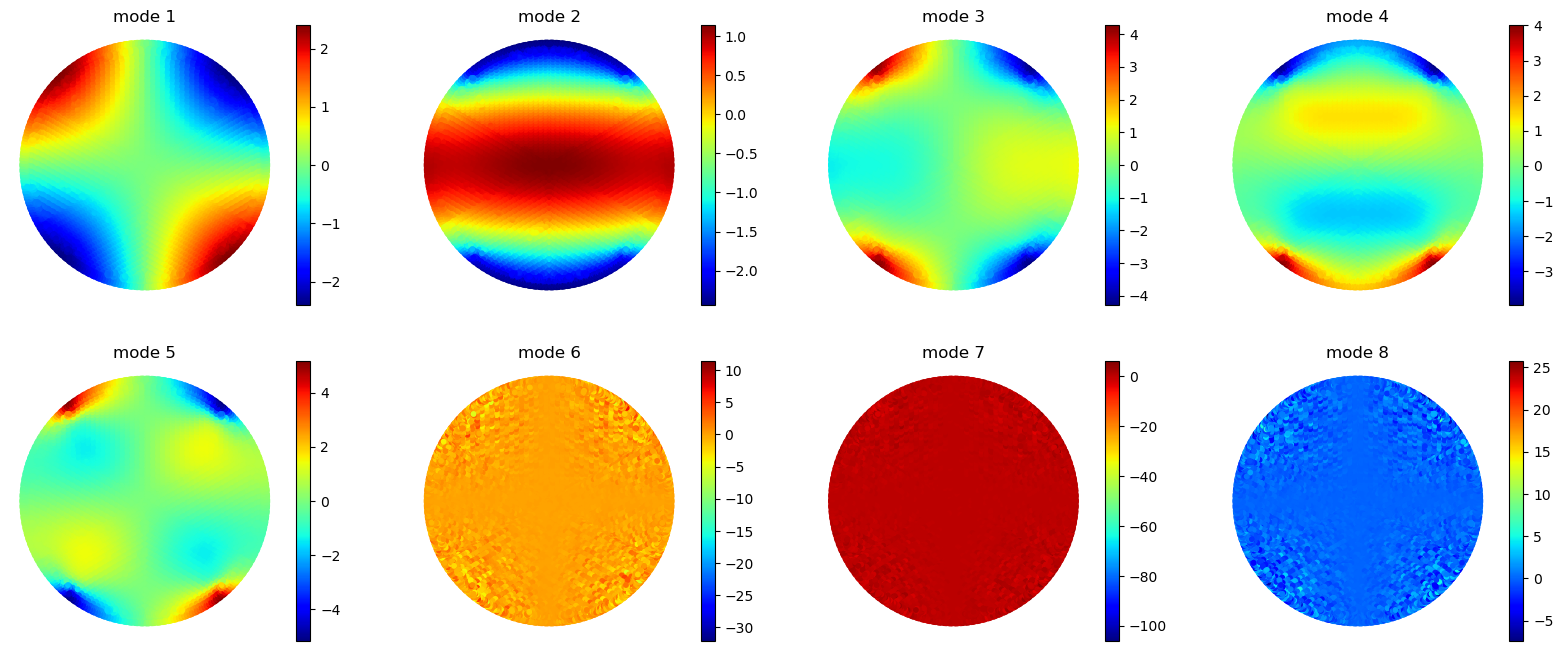

In [224]:
nrow = 2 #take ~2 minutes to run 15 rows
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
i = 0
for modeID in range(1,4*nrow+1):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, UMat8[:,modeID-1])
    ax[irow][icol].set_title('mode %d'%modeID)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])

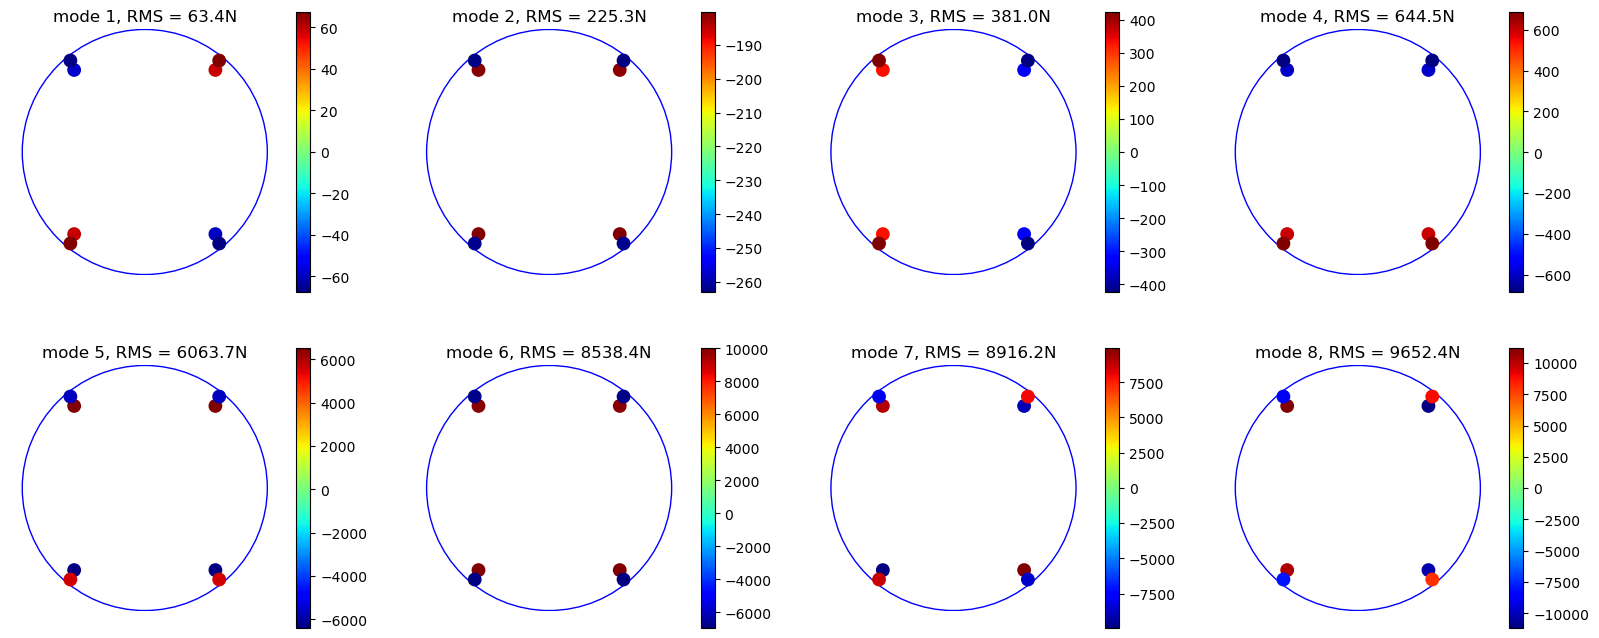

In [98]:
nrow = 2
fig, ax = plt.subplots(nrow,4,figsize=(20,4*nrow))
i = 0
for modeID in range(1,4*nrow+1):
    irow = np.int8(i/4)
    icol = np.mod(i,4)
    i += 1
    circle = plt.Circle((0., 0.), radius_of_CA, color='blue', fill=False)
    ax[irow][icol].add_artist(circle)
    img = ax[irow][icol].scatter(sax8, say8,80, VMat8[:,modeID-1])
    ax[irow][icol].set_title('mode %d, RMS = %.1fN'%(modeID, forcerms[modeID-1]))
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    ax[irow][icol].set_xlim(-radius_of_CA*1.1, radius_of_CA*1.1)
    ax[irow][icol].set_ylim(-radius_of_CA, radius_of_CA)
    fig.colorbar(img, ax=ax[irow][icol])

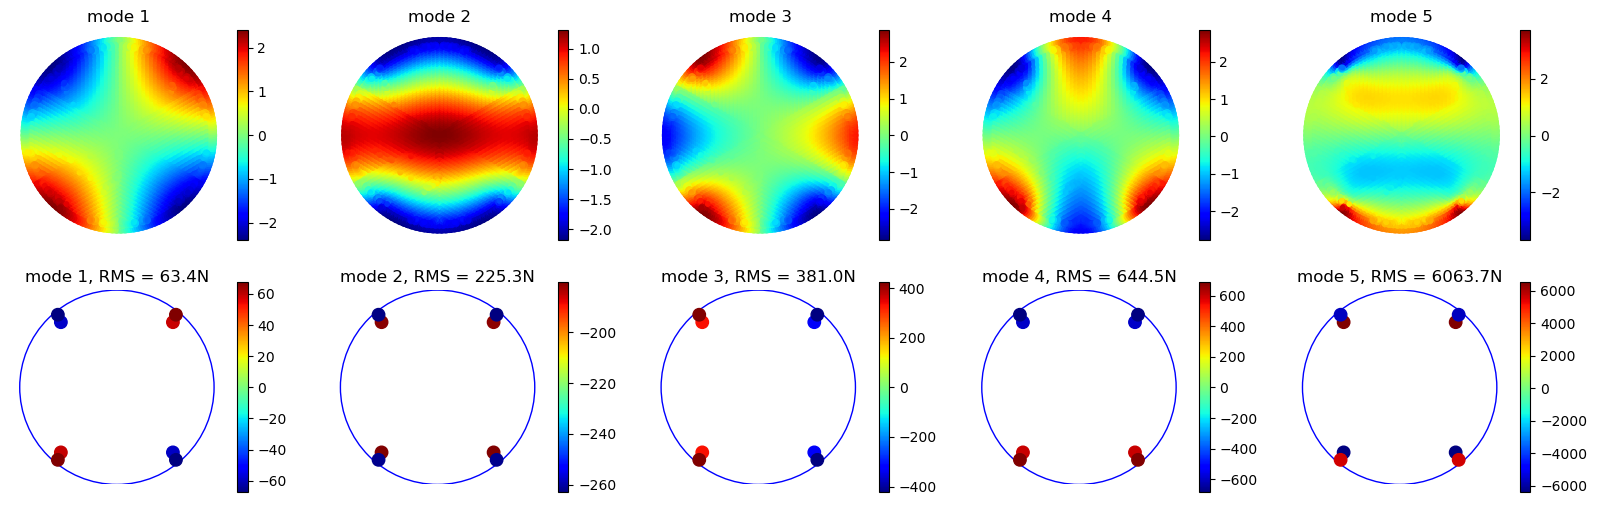

In [127]:
nrow = 2 #take ~2 minutes to run 15 rows
fig, ax = plt.subplots(nrow,5,figsize=(20,3*nrow))
i = 0
for modeID in range(1,5+1):
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1

    img = ax[irow][icol].scatter(nodex, nodey,10, UMat8[:,modeID-1])
    ax[irow][icol].set_title('mode %d'%modeID)
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    fig.colorbar(img, ax=ax[irow][icol])
    
for modeID in range(1,5+1):    
    irow = np.int8(i/5)
    icol = np.mod(i,5)
    i += 1
    circle = plt.Circle((0., 0.), radius_of_CA, color='blue', fill=False)
    ax[irow][icol].add_artist(circle)
    img = ax[irow][icol].scatter(sax8, say8,80, VMat8[:,modeID-1])
    ax[irow][icol].set_title('mode %d, RMS = %.1fN'%(modeID, forcerms[modeID-1]))
    ax[irow][icol].axis('square')
    ax[irow][icol].axis('off')
    ax[irow][icol].set_xlim(-radius_of_CA*1.1, radius_of_CA*1.1)
    ax[irow][icol].set_ylim(-radius_of_CA, radius_of_CA)
    fig.colorbar(img, ax=ax[irow][icol])

In [104]:
#VMat8[:,1] -= np.mean(VMat8[:,1]) #if we do this, the deformation in plot below will be too small...

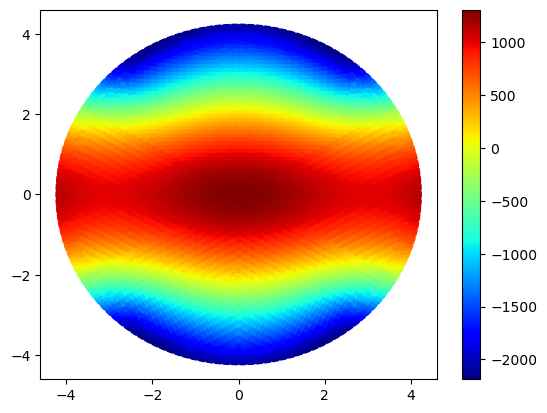

In [128]:
plt.scatter(nodex, nodey,10, Afz8@VMat8[:,1])
#plt.scatter(nodex, nodey,10, UMat8[:,1])
plt.colorbar();

[0.95873594]


Text(0.5, 1.0, 'residual map (in nm)')

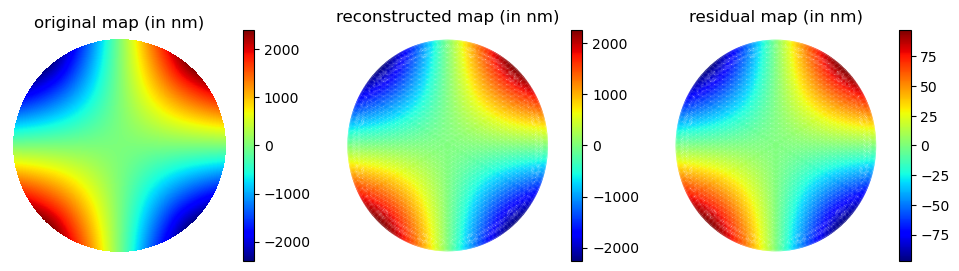

In [194]:
nfitmode = 1
from scipy.interpolate import LinearNDInterpolator 

#[x1, y1] are the x and y grid in M1B. 
#CenterCol and centerRow are swapped, because they were meant for h5 CS
#Lines below, we will transpose the h5 map to match this.
#.  we will also reverse the sign of h5 maps to be in M1B.
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)

#if2d = m1s #this is the measured influence function, which is already in M1B, in nm
if2d = griddata((nodex, nodey), UMat8[:,0], (x1,y1), method='linear')*1e3 #1 micron of UMat8[], in nm ---- test
mask = ~np.isnan(if2d)

interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), if2d[mask], fill_value=0)
mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
noder = np.sqrt(nodex**2+nodey**2)
mapOntoGMTFEgrid[noder>5.18] = 0 #those on the edge, outside of max(nodex) are not interpolated correctly
validIdx = (mapOntoGMTFEgrid!=0) #& (noder>3.85)

scaleF = UMat8[validIdx,:nfitmode].transpose() / UMat.shape[0] @ (mapOntoGMTFEgrid[validIdx]*1e-3) #all in um
print(scaleF)

#scaleF[0] = 1

residual = mapOntoGMTFEgrid[validIdx]
recon = np.zeros_like(residual)
for i in range(nfitmode):
    recon += UMat8[validIdx,i] *scaleF[i] #this is residual, in micron
residual -= recon*1e3 #in nm
#print(scaleF)

fig, ax = plt.subplots(1,3,figsize=(12,3))
img = ax[0].imshow(if2d, origin='lower')#, vmin=-200, vmax=200)
ax[0].axis('off')
ax[0].set_title('original map (in nm)')
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(nodex[validIdx], nodey[validIdx], 0.1, recon*1e3)#, vmin=-200, vmax=200) #in nm
fig.colorbar(img, ax=ax[1])
ax[1].axis('off')
ax[1].set_title('reconstructed map (in nm)')
img = ax[2].scatter(nodex[validIdx], nodey[validIdx], 0.1, residual)#, vmin=-200, vmax=200) #in nm
fig.colorbar(img, ax=ax[2])
ax[2].axis('off');
ax[2].set_title('residual map (in nm)')
#this fit is dominated by the vast center area

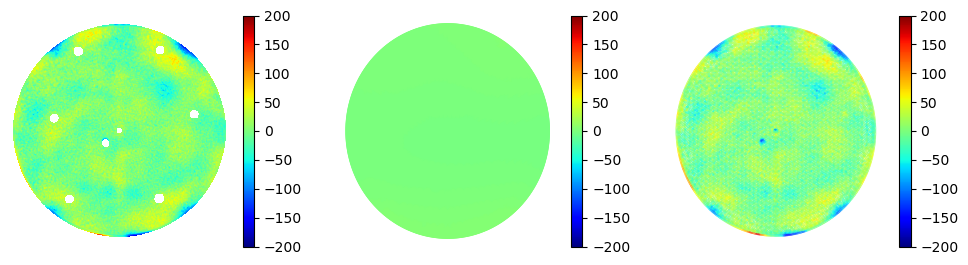

In [177]:

fig, ax = plt.subplots(1,3,figsize=(12,3))
img = ax[0].imshow(if2d, origin='lower', vmin=-200, vmax=200)
ax[0].axis('off')
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(nodex[validIdx], nodey[validIdx], 10, recon*1e3, vmin=-200, vmax=200) #in nm
fig.colorbar(img, ax=ax[1])
ax[1].axis('off')
img = ax[2].scatter(nodex[validIdx], nodey[validIdx], 0.1, residual, vmin=-200, vmax=200) #in nm
fig.colorbar(img, ax=ax[2])
ax[2].axis('off');
#this fit is dominated by the vast center area

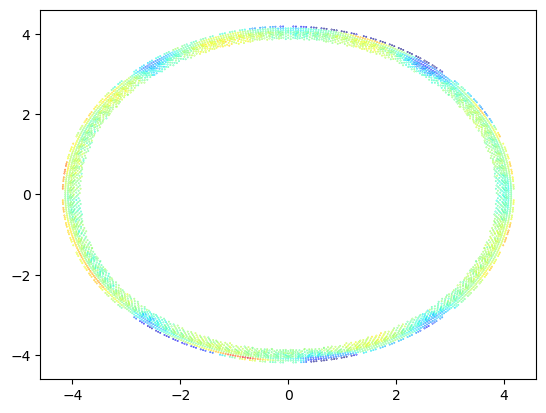

In [171]:
plt.scatter(nodex[validIdx], nodey[validIdx], 0.1, mapOntoGMTFEgrid[validIdx], vmin=-200, vmax=200) #in nm

In [197]:
UMat8[:,:nfitmode].transpose() / UMat8.shape[0]  @ (UMat8[:,0]*1e-3)

array([0.001])

In [190]:
np.sum(validIdx)

3810

In [191]:
np.std(UMat8[:,0])

0.9999999999999996

Afz = readtable("Afz-nohp-10-Jan-2025.csv"); 
Afz = Afz.Variables; 
C = [x_red'; y_red'; ones(size(x_red))']; // only single double triple locations 
Cn = null(C); // find balanced force set 
Fex = zeros(165,5); 
Fex(ind(1:165),:) = Cn; // expand it to 165 elements 
z_red = Afz*Fex; 
A_red = z_red*pinv(Cn); 
[Ur,Sr,Vr] = svd(A_red,0);

In [222]:
TRIFFolder = '/influnce_matrix_files/OA_influence_matrices_all/OA_single_double_triple_*/'
TRIFFolder = glob.glob(dataFolder+TRIFFolder)[0]
print(TRIFFolder)

/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_single_double_triple_ZBM_06Feb2025/


In [223]:
df = pd.read_csv(TRIFFolder+'Uz_sdt-06-Feb-2025.csv', header=None)
UMat8 = np.array(df)
UMat8 = UMat8 * np.sqrt(U.shape[0])

In [210]:
np.std(UMat8,axis=0)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       0.99999866, 0.99998644, 0.99999428])

In [216]:
for i in range(8):
    for j in range(i+1,8):
        print('%d, %d, %.2f'%(i,j,np.dot(UMat8[:,i], UMat8[:,j])))

0, 1, -0.00
0, 2, -0.00
0, 3, -0.00
0, 4, 0.00
0, 5, -0.00
0, 6, -0.00
0, 7, 0.00
1, 2, -0.00
1, 3, 0.00
1, 4, 0.00
1, 5, 0.00
1, 6, -0.00
1, 7, -0.00
2, 3, 0.00
2, 4, -0.00
2, 5, -0.00
2, 6, -0.00
2, 7, -0.00
3, 4, 0.00
3, 5, -0.00
3, 6, -0.00
3, 7, 0.00
4, 5, -0.00
4, 6, -0.00
4, 7, 0.00
5, 6, -0.00
5, 7, -0.00
6, 7, -0.00


[0.00049042 0.00094789 0.00087682 0.00059195 0.00140805]


Text(0.5, 1.0, 'residual map (in nm)')

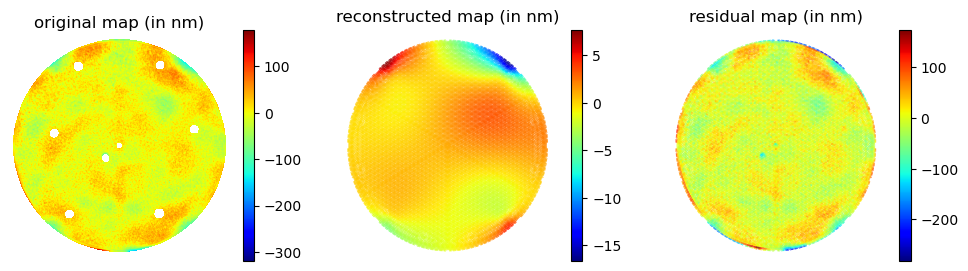

In [227]:
nfitmode = 5
from scipy.interpolate import LinearNDInterpolator 

#[x1, y1] are the x and y grid in M1B. 
#CenterCol and centerRow are swapped, because they were meant for h5 CS
#Lines below, we will transpose the h5 map to match this.
#.  we will also reverse the sign of h5 maps to be in M1B.
[x1, y1] = mkXYGrid(m1s, centerCol, centerRow, pixelSize)

if2d = m1s #this is the measured influence function, which is already in M1B, in nm
#if2d = griddata((nodex, nodey), UMat8[:,2], (x1,y1), method='linear')*1e3 #1 micron of UMat8[], in nm ---- test
mask = ~np.isnan(if2d)

interp = LinearNDInterpolator(list(zip(x1[mask], y1[mask])), if2d[mask], fill_value=0)
mapOntoGMTFEgrid = interp(nodex, nodey).ravel()
noder = np.sqrt(nodex**2+nodey**2)
mapOntoGMTFEgrid[noder>5.18] = 0 #those on the edge, outside of max(nodex) are not interpolated correctly-----
validIdx = (mapOntoGMTFEgrid!=0) #& (noder>3.85)

scaleF = UMat8[validIdx,:nfitmode].transpose() / UMat.shape[0] @ (mapOntoGMTFEgrid[validIdx]*1e-3) #all in um
print(scaleF)

#scaleF[0] = 1

residual = mapOntoGMTFEgrid[validIdx]
recon = np.zeros_like(residual)
for i in range(nfitmode):
    recon += UMat8[validIdx,i] *scaleF[i] #this is residual, in micron
residual -= recon*1e3 #in nm
#print(scaleF)

fig, ax = plt.subplots(1,3,figsize=(12,3))
img = ax[0].imshow(if2d, origin='lower')#, vmin=-200, vmax=200)
ax[0].axis('off')
ax[0].set_title('original map (in nm)')
fig.colorbar(img, ax=ax[0])
img = ax[1].scatter(nodex[validIdx], nodey[validIdx], 0.1, recon*1e3)#, vmin=-200, vmax=200) #in nm
fig.colorbar(img, ax=ax[1])
ax[1].axis('off')
ax[1].set_title('reconstructed map (in nm)')
img = ax[2].scatter(nodex[validIdx], nodey[validIdx], 0.1, residual)#, vmin=-200, vmax=200) #in nm
fig.colorbar(img, ax=ax[2])
ax[2].axis('off');
ax[2].set_title('residual map (in nm)')
#this fit is dominated by the vast center area

In [228]:
from scipy.io import savemat
data = {'m1s': m1s, 'x1': x1, 'y1':y1}
savemat('m1s.mat', data)